In [35]:
import pandas as pd
import matplotlib.pyplot  as  plt
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [37]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [38]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [39]:
df.shape

(23, 2)

In [40]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


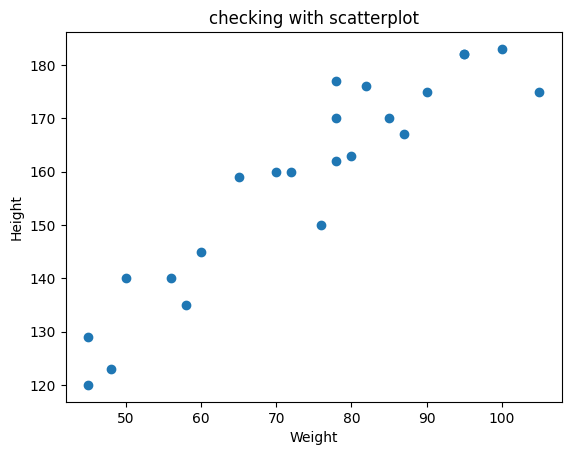

In [42]:
# scatter  plot 
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("checking with scatterplot")
plt.show()

In [43]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


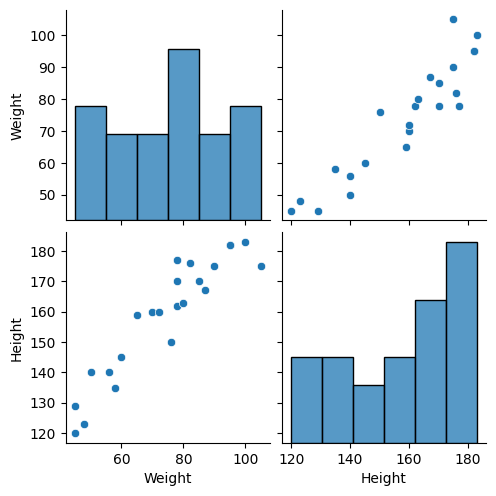

In [44]:
## seabborn for visualization
import seaborn as sns
sns.pairplot(df)

In [45]:
# independent and  dependent features
 # independent  features should be dataframe or 2 d  array
x = df[["Height"]]
y = df[["Weight"]]# series or  iD  array

In [46]:
x_series = df["Height"]
np.array(x_series).shape

(23,)

In [47]:
# train annd test split
from  sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test  =  train_test_split(x,y,test_size = 0.25,random_state=42)

In [49]:
# standardization
from sklearn.preprocessing  import StandardScaler

In [50]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)

In [51]:
X_test = scaler.transform(x_test)

In [52]:
X_test

array([[ 1.13884569],
       [ 0.75052868],
       [-2.02316426],
       [ 1.41621498],
       [ 0.14031623],
       [ 1.02789797]])

In [53]:
# apply linear  regression
from sklearn.linear_model import LinearRegression

In [54]:
regression = LinearRegression(n_jobs = -1)


In [55]:
regression.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [69]:
print("Slop :",regression.coef_)
print("Intercept:",regression.intercept_)

Slop : [[15.84018607]]
Intercept: [72.47058824]


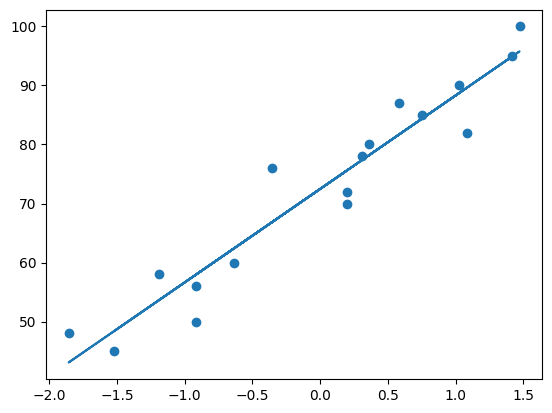

In [57]:
# plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

## prediction of test data
1) predicted height output = intercept+coef_(weight)
2) y_pred_test  = 156.470 +  17.29(x_test)

In [58]:
# presiction  for test data
y_pred = regression.predict(X_test)

In [59]:
# performance  metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse  = np.sqrt(mse)
print("mean_squared_error",mse)
print("mean_absolute_error",mae)
print("root of mean_squared_error",rmse)

mean_squared_error 95.97176782989375
mean_absolute_error 8.247128517477355
root of mean_squared_error 9.796518148296045


## R square

## formula r^2 = 1 - ssres / sstot
1) r^2 = coefficient of  determination
2) ss res  = sum  of squares of  residuals
3) ss tot =total  sum of  squares


In [61]:
from sklearn.metrics  import r2_score

In [62]:
score = r2_score(y_test,y_pred)
print(score)

0.7469247259100369


## Adjusted  r2 = 1 - [(1-r2)*(n-1)/(n-k-1)]

1) where - R2 =  the r2  of  the  modeln  :  the number of observations k :  the number of predictor  variables

In [63]:
#display adjusted r-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6836559073875461

In [64]:
# OLS linear  regression
import statsmodels.api  as  sm

In [65]:
model =sm.OLS(y_train,x_train).fit()

In [66]:
prediction =  model.predict(X_test)
print(prediction)

[ 18.03952762  11.8885139  -32.04729835  22.43310884   2.22263521
  16.28209513]


In [67]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                             0.7613
Date:                Thu, 18 Dec 2025   Prob (F-statistic):                       0.396
Time:                        15:44:29   Log-Likelihood:                         -96.971
No. Observations:                  17   AIC:                                      195.9
Df Residuals:                      16   BIC:                                      196.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
# prediction for ne data
regression.predict(scaler.transform([[72]]))

C:\Users\Shrio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.75508987]])

### THANK YOU